# Nehla Shajahan - case study 10

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [4]:
data = pd.read_csv('cars.csv')

In [5]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [6]:
data.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    int64  
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    int64  
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 14.4 KB


In [8]:
data.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
dtype: int64

In [9]:
data.shape

(261, 7)

In [10]:
data.describe()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.750958,106.360153,3022.134100,15.547893,1976.819923
std,7.823570,1.733310,108.869697,40.499959,857.036976,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3693.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


# Plotting a pairplot

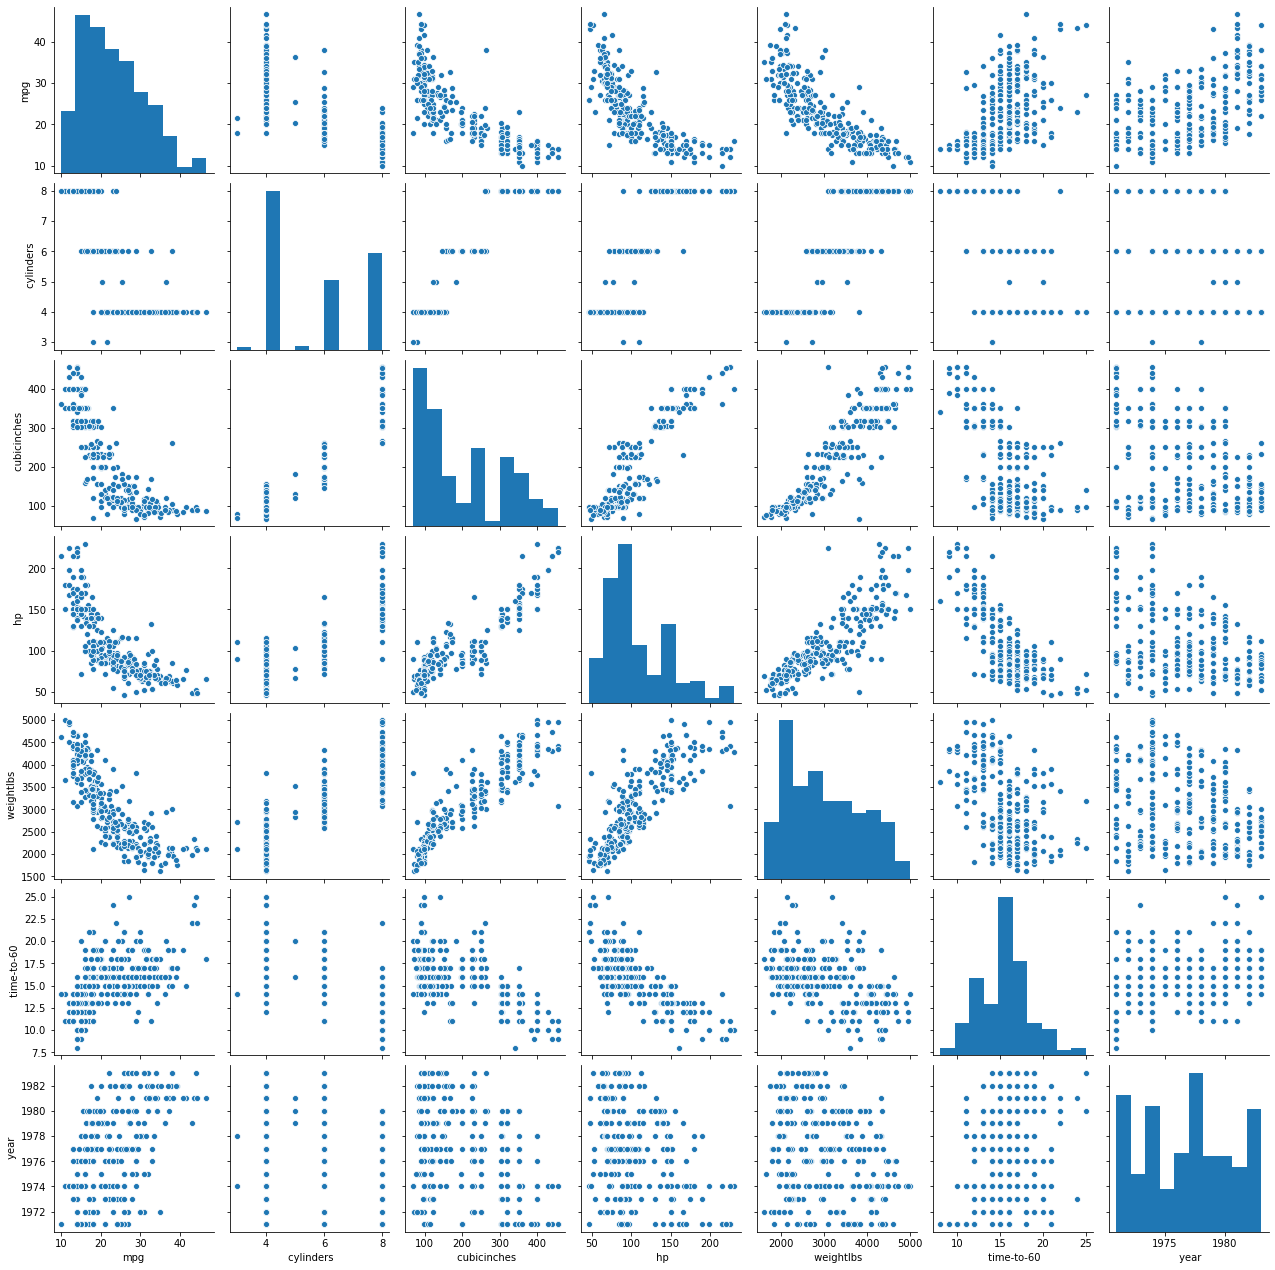

In [26]:
sns.pairplot(data)

# K means clustering 

In [11]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 2)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    print(kmeans.inertia_)

194503699.73172423
48330048.40995053
23486145.115754444
12504926.954702374
9101073.139857514
6746303.184096387
5032023.203567982
3764068.3836455434
3138369.0821527177
2664806.2097274074
2284731.8861149596


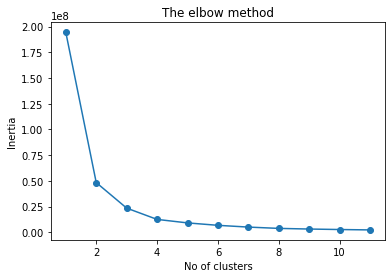

In [12]:
plt.plot(range(1,12),inertia, '-o')
plt.title("The elbow method")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

# Taking no: of clusters as 3

In [13]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters = 3)
model_kmeans.fit(data)
labels = model_kmeans.predict(data)
print(labels)

[0 1 2 0 1 0 0 0 2 1 1 1 0 2 0 0 1 2 1 1 1 1 2 0 1 1 1 0 2 1 1 2 1 0 1 2 1
 1 0 2 0 0 2 2 2 1 0 1 1 2 0 2 2 1 0 0 2 1 1 0 2 1 2 1 0 2 1 1 1 0 2 1 1 1
 1 2 2 1 1 1 0 0 2 1 1 1 2 2 1 1 1 1 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 1 2 1
 2 0 1 1 0 2 2 1 0 1 1 0 2 1 1 0 1 1 1 1 1 0 2 0 0 1 2 2 2 1 1 1 1 2 2 2 2
 2 2 1 1 0 2 1 2 1 1 1 2 2 0 2 2 1 2 2 1 2 1 1 2 0 1 1 1 0 2 2 1 2 1 0 2 1
 2 2 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 2 2 1 0 1 2 0 2 2 2 1 1 2 1 1 0 1 0 2 2
 0 0 0 1 0 1 1 2 2 1 1 0 2 1 0 2 1 1 0 2 0 1 0 2 0 1 1 1 1 1 2 0 2 1 0 1 2
 2 2]


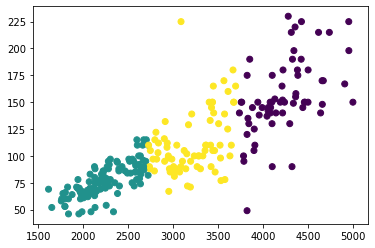

In [14]:
mpg =data[' weightlbs']
hp = data[' hp']
plt.scatter(mpg,hp,c=labels)

From the graph, we can understand that weightlbs and horsepower are inversely proportional to each other that is, when weightlbs increases horsepower decreases. 

In [33]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


# K means clustering

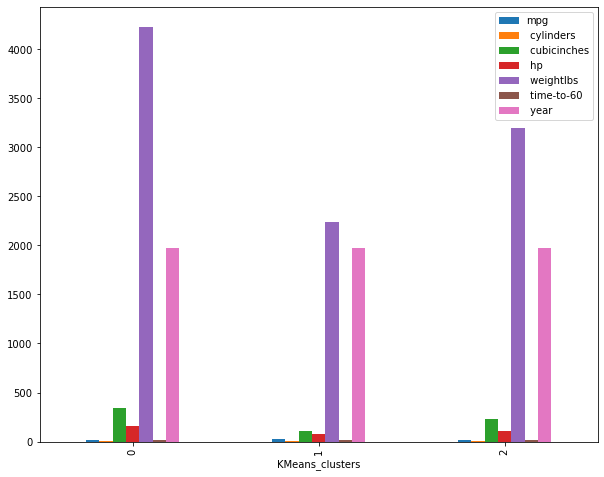

In [16]:
data["KMeans_clusters"]=labels
data.groupby("KMeans_clusters").agg('mean').plot.bar(figsize=(10,8))

In [ ]:
# Optimum number of clusters =3

# Heirarchial clustering

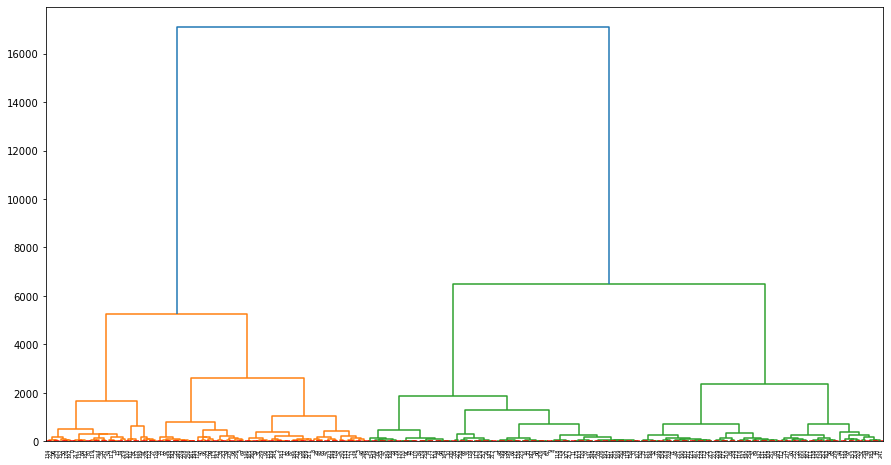

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts= 'True')
plt.hlines(0.5,0,5000,colors = 'r', linestyles='dashed')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity="euclidean",linkage='ward')
labels = cluster.fit_predict(data)
labels

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [22]:
# optimum no: of clusters = 2

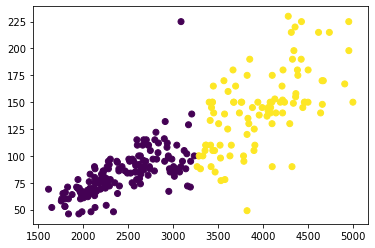

In [23]:
mpg =data[' weightlbs']
hp = data[' hp']
plt.scatter(mpg,hp,c=labels)

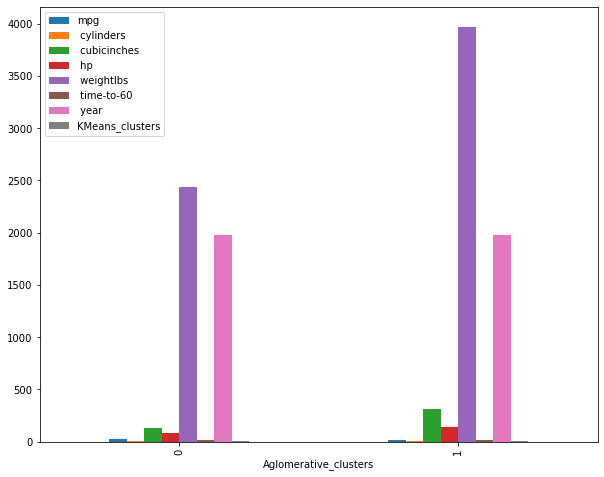

In [24]:
data["Aglomerative_clusters"]=labels
data.groupby("Aglomerative_clusters").agg('mean').plot.bar(figsize=(10,8))